**In this project we are going to analyse the air quality of some indian cities.On the basis of analysis we will built a model that predict the air quality in future.**

**For Air Quality Prediction we will use 4 algorithms**

1.  Linear Regression
2.Lasso regression
3.Ridge Regression
4.Decision








In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
data=pd.read_csv('city_day.csv')
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [137]:
data.shape

(29531, 16)

In [138]:
data.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [139]:
data['NO'].mean()

np.float64(17.574729662029362)

In [140]:
data.dtypes

,0
City,object
Date,object
PM2.5,float64
PM10,float64
NO,float64
NO2,float64
NOx,float64
NH3,float64
CO,float64
SO2,float64


In [141]:
data.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [142]:
data['NH3'].isnull().sum()

np.int64(10328)

In [143]:
data['PM2.5'].mean()

np.float64(67.45057794890306)

In [144]:
data['PM2.5'].fillna(data['PM2.5'].mean(),inplace=True)

<ipython-input-144-80ea9480ee6c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PM2.5'].fillna(data['PM2.5'].mean(),inplace=True)


In [154]:
data['PM10'].mean()
data['PM10'].fillna(data['PM10'].mean(),inplace=True)

<ipython-input-154-80eb65703be2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PM10'].fillna(data['PM10'].mean(),inplace=True)


In [146]:
data['NO'].mean()
data['NO'].fillna(data['NO'].mean(),inplace=True)

<ipython-input-146-e783fee92462>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NO'].fillna(data['NO'].mean(),inplace=True)


In [155]:
data['NO2'].mean()
data['NO2'].fillna(data['NO'].mean(),inplace=True)

<ipython-input-155-7a6f1e5e075f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NO2'].fillna(data['NO'].mean(),inplace=True)


In [147]:
data['SO2'].mean()
data['SO2'].fillna(data['SO2'].mean(),inplace=True)

<ipython-input-147-40b1f1d040a2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SO2'].fillna(data['SO2'].mean(),inplace=True)


In [148]:
data['CO'].mean()
data['CO'].fillna(data['CO'].mean(),inplace=True)

<ipython-input-148-985f205e6ccd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CO'].fillna(data['CO'].mean(),inplace=True)


In [149]:
data['O3'].mean()
data['O3'].fillna(data['O3'].mean(),inplace=True)

<ipython-input-149-18d6568bd27e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['O3'].fillna(data['O3'].mean(),inplace=True)


In [150]:
data['AQI'].mean()
data['AQI'].fillna(data['AQI'].mean(),inplace=True)

<ipython-input-150-38b9996cee16>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['AQI'].fillna(data['AQI'].mean(),inplace=True)


In [151]:
data.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,11140
NO,0
NO2,3585
NOx,4185
NH3,10328
CO,0
SO2,0


In [156]:
newdata=data.drop(['City', 'Date','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)
newdata.head(10)

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67.450578,118.127103,0.92000,18.22,0.920000,27.64,133.36,166.463581
1,67.450578,118.127103,0.97000,15.69,0.970000,24.55,34.06,166.463581
2,67.450578,118.127103,17.40000,19.30,17.400000,29.07,30.70,166.463581
3,67.450578,118.127103,1.70000,18.48,1.700000,18.59,36.08,166.463581
4,67.450578,118.127103,22.10000,21.42,22.100000,39.33,39.31,166.463581
5,67.450578,118.127103,45.41000,38.48,45.410000,45.76,46.51,166.463581
6,67.450578,118.127103,112.16000,40.62,112.160000,32.28,33.47,166.463581
7,67.450578,118.127103,80.87000,36.74,80.870000,38.54,31.89,166.463581
8,67.450578,118.127103,29.16000,31.00,29.160000,58.68,25.75,166.463581
9,67.450578,118.127103,17.57473,7.04,2.248598,8.29,4.55,166.463581


In [157]:
newdata.isnull().sum()

,0
PM2.5,0
PM10,0
NO,0
NO2,0
CO,0
SO2,0
O3,0
AQI,0


In [158]:
dataready=newdata.astype(int)
dataready

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0,18,0,27,133,166
1,67,118,0,15,0,24,34,166
2,67,118,17,19,17,29,30,166
3,67,118,1,18,1,18,36,166
4,67,118,22,21,22,39,39,166
...,...,...,...,...,...,...,...,...
29526,15,50,7,25,0,8,23,41
29527,24,74,3,26,0,12,30,70
29528,22,65,3,29,0,8,30,68
29529,16,49,4,29,0,9,28,54


In [159]:
dataready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   29531 non-null  int64
 1   PM10    29531 non-null  int64
 2   NO      29531 non-null  int64
 3   NO2     29531 non-null  int64
 4   CO      29531 non-null  int64
 5   SO2     29531 non-null  int64
 6   O3      29531 non-null  int64
 7   AQI     29531 non-null  int64
dtypes: int64(8)
memory usage: 1.8 MB


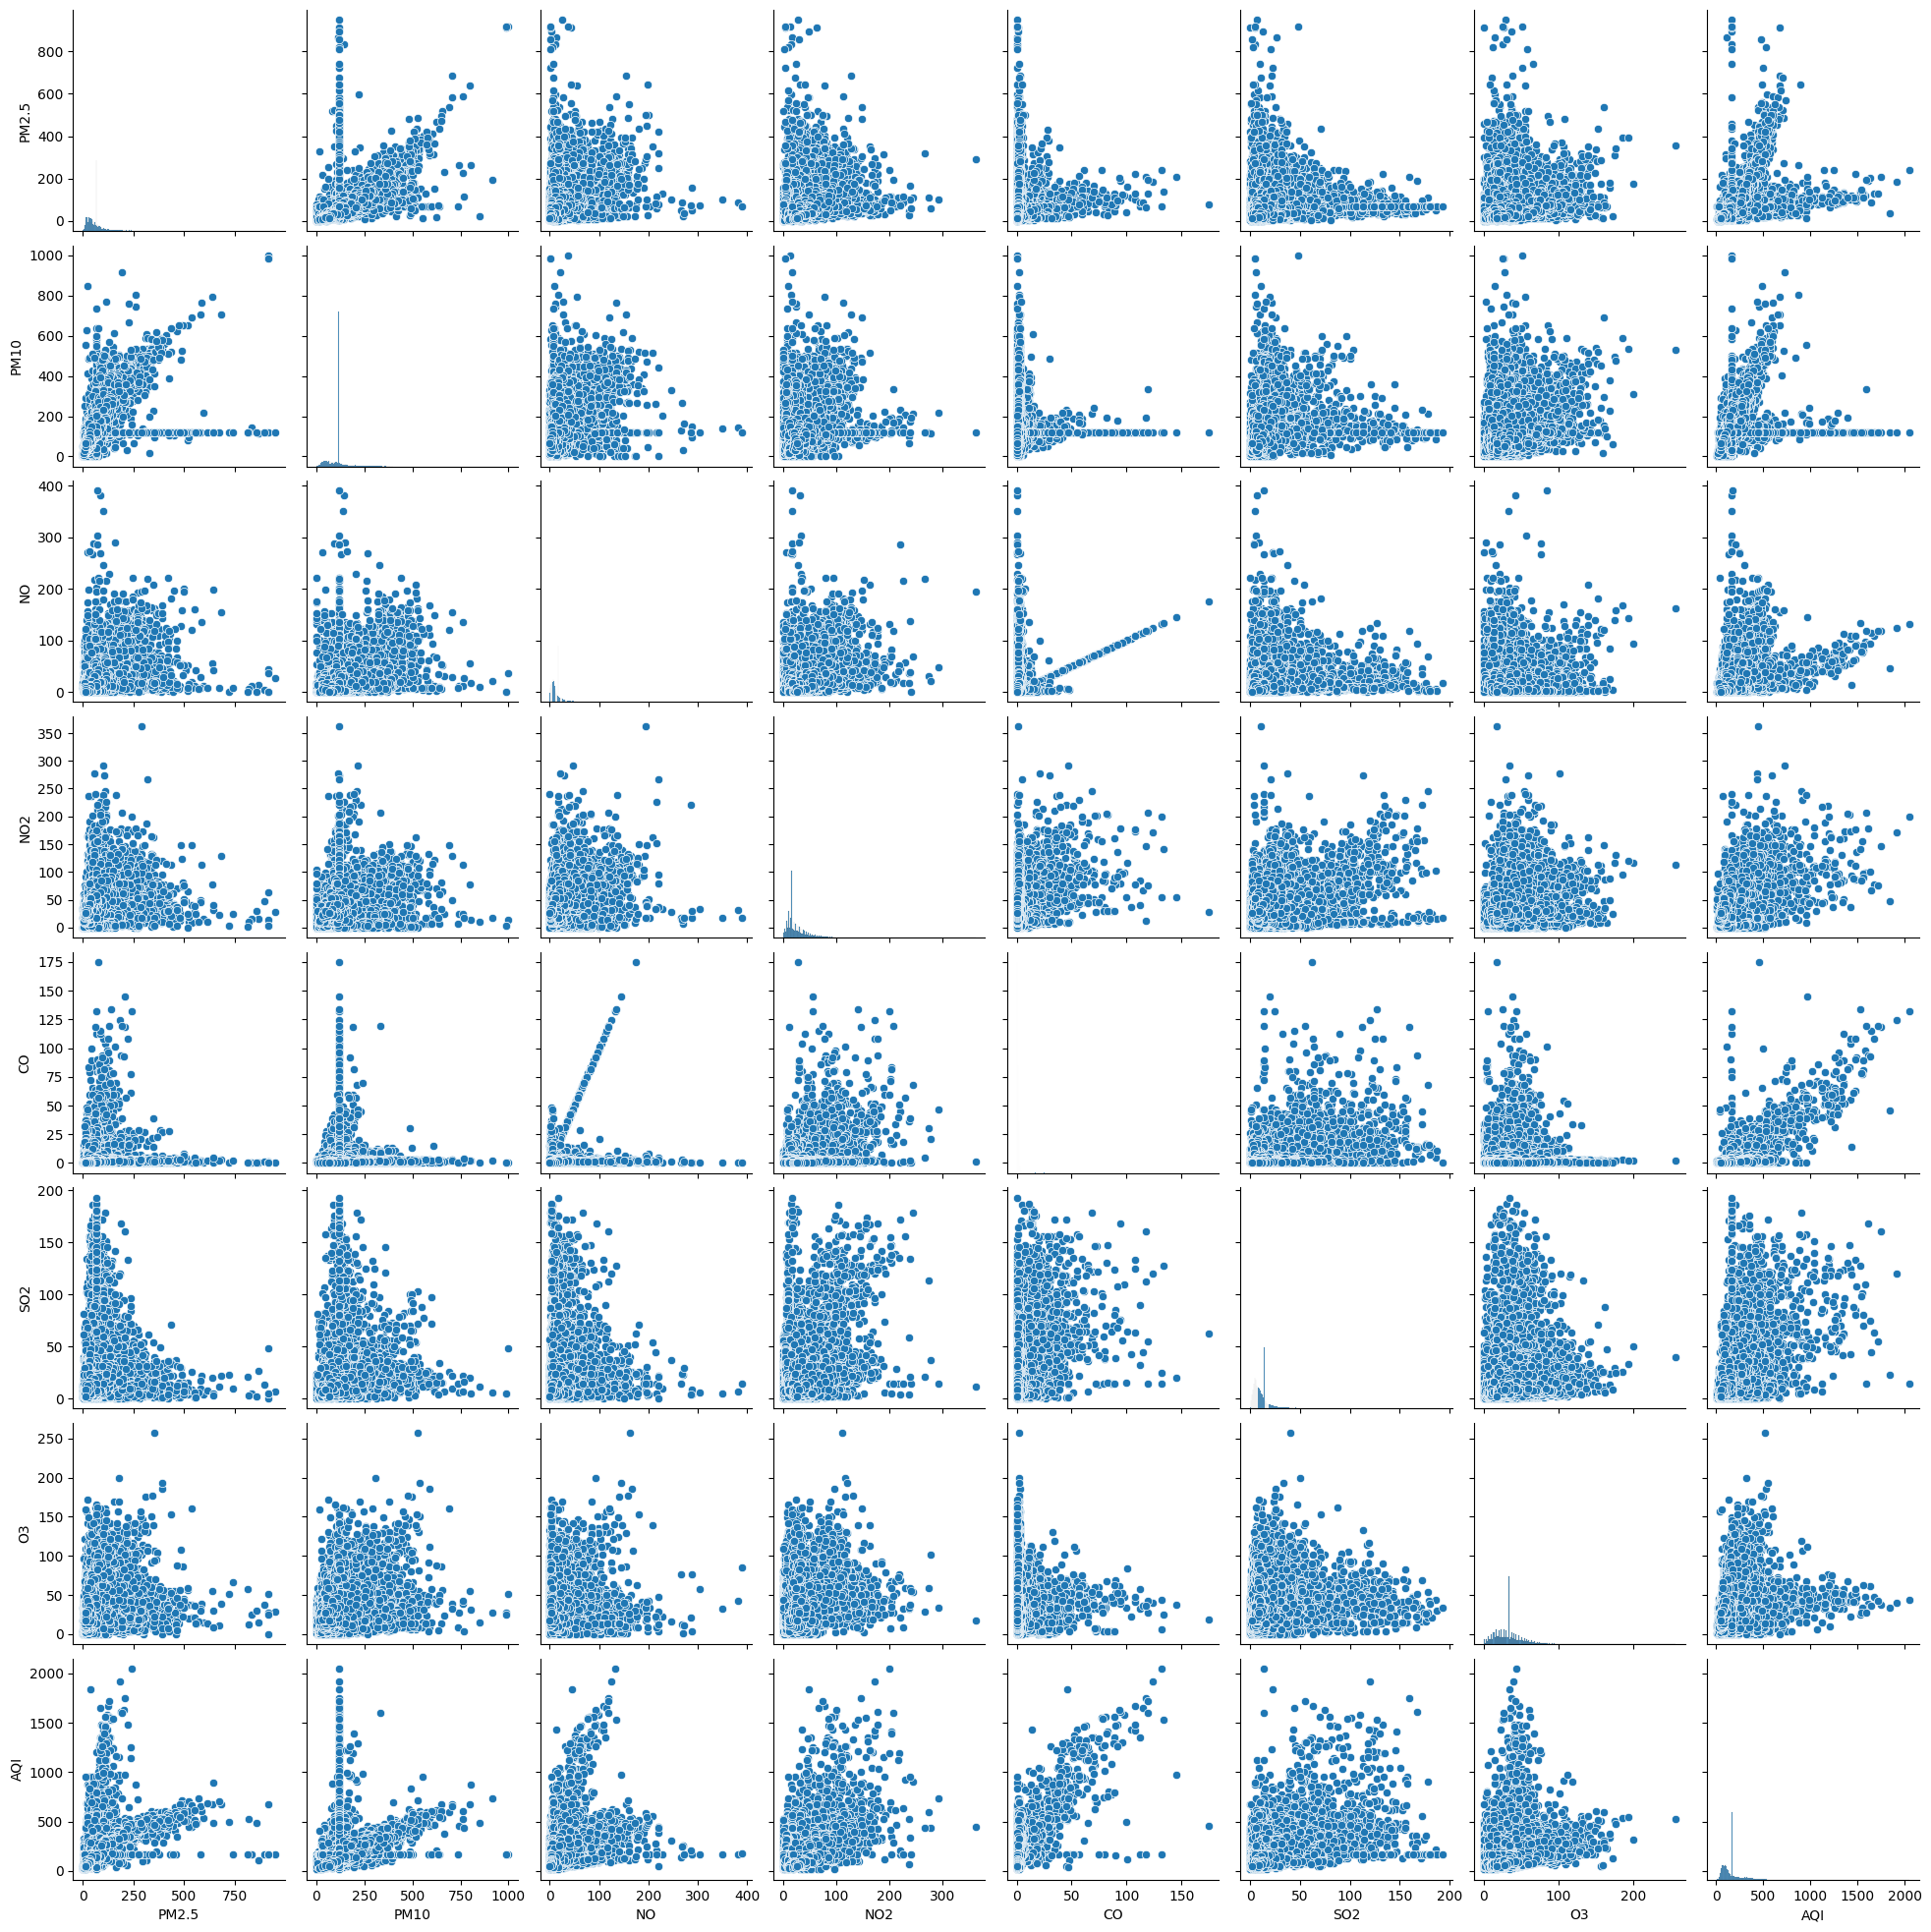

In [160]:
sns.pairplot(dataready)

<Axes: >

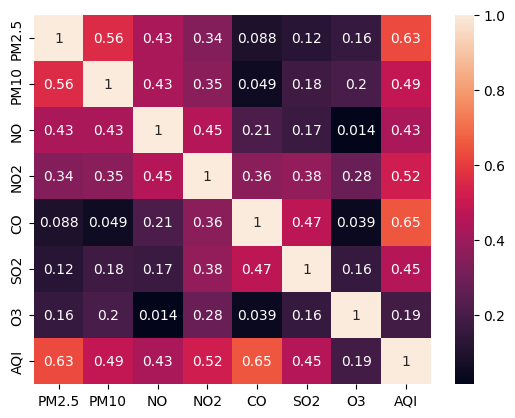

In [161]:
sns.heatmap(dataready.corr(),annot=True)

**Insights**
1.  Whenever the amount of particulate matter increase we can see the air quality index decrease
2.PM2.5 and CO are highly correlate with AQI.


In [184]:
from sklearn.model_selection import train_test_split
x=dataready[['PM2.5','PM10','NO','SO2','CO']]
y=dataready['AQI']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [214]:
x_test.head(5)


,PM2.5,PM10,NO,SO2,CO
23677,75,140,28,8,0
7009,93,143,27,14,3
1055,111,118,15,112,15
6265,21,57,3,5,0
6212,27,58,2,5,0


**Linear regression model**

In [215]:
y_test.head(5)

,AQI
23677,167
7009,199
1055,371
6265,70
6212,70


In [186]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [187]:
lr.coef_

array([ 0.99834112,  0.31135353,  0.15479336,  0.80948641, 10.33266321])

In [188]:
lr.intercept_

np.float64(30.069047593508998)

In [294]:
pred1=lr.predict(x_test)
pred1

array([159.3442313 , 213.94854684, 425.59895539, ...,  53.6773377 ,
       149.49492474, 237.33206078])

In [304]:
predt1=lr.predict(x_train)
predt1

array([ 61.5904602 , 147.66191618, 125.88850039, ..., 154.23347601,
       105.89018088,  90.33471329])

In [217]:
print("Accuracy")
lr.score(x_test,y_test)

Accuracy


0.8213756781772861

**Lasso Regression**

In [191]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [192]:
pred2=lasso.predict(x_test)
pred2

array([159.37058862, 213.91496913, 425.39006269, ...,  53.72876205,
       149.53958297, 237.25728667])

In [305]:
predt2=lasso.predict(x_train)
predt2

array([ 61.60269261, 147.70324667, 125.91144743, ..., 154.28519469,
       105.86573547,  90.35436744])

In [193]:
lasso.coef_

array([ 0.99850294,  0.31133248,  0.15383353,  0.81036082, 10.30966624])

In [194]:
lasso.alpha

1.0

In [218]:
print("Accuracy")
lasso.score(x_test,y_test)

Accuracy


0.8211820478939356

**Ridge Regrassion**

In [196]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [197]:
ridge.coef_

array([ 0.99834114,  0.31135341,  0.154794  ,  0.80948839, 10.33265176])

In [198]:
pred3=ridge.predict(x_test)
pred3

array([159.34424439, 213.94853671, 425.59899715, ...,  53.67736844,
       149.49492668, 237.33208909])

In [306]:
predt3=ridge.predict(x_train)
predt3

array([ 61.59045129, 147.66193667, 125.88850744, ..., 154.23349972,
       105.890152  ,  90.33469549])

In [219]:
print("Accuracy")
ridge.score(x_test,y_test)

Accuracy


0.8213756007672655

**Decision tree**

In [290]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(min_samples_split=55, random_state=66)
dt.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_split=55, random_state=66)

In [291]:
pred4=dt.predict(x_test)
pred4

array([192.33333333, 302.        , 430.91428571, ...,  57.        ,
       142.38461538, 226.87755102])

In [307]:
predt4=dt.predict(x_train)
predt4

array([101.25641026, 165.79250936, 143.58333333, ..., 154.9       ,
       119.39473684, 126.4       ])

In [292]:
print("Accuracy")
dt.score(x_test,y_test)


Accuracy


0.8184320592481256

**PERFORMANCE**

In [296]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model")
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), lr.score(x_test,y_test)))
print("""Lasso Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), lasso.score(x_test,y_test)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), ridge.score(x_test,y_test)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), dt.score(x_test,y_test)))


Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 57.8588 	 		 0.8214
Lasso Regression 		 57.8901 	 		 0.8212
Ridge Regression 		 57.8588 	 		 0.8214
Decision Tree Regressor		 58.3336 	 		 0.8184


In [308]:
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model")
print("""Linear Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_train, predt1)), lr.score(x_train,y_train)))
print("""Lasso Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_train, predt2)), lasso.score(x_train,y_train)))
print("""Ridge Regression \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_train, predt3)), ridge.score(x_train,y_train)))
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_train, predt4)), dt.score(x_train,y_train)))


Model			 RootMeanSquareError 		 Accuracy of the model
Linear Regression 		 59.6719 	 		 0.7832
Lasso Regression 		 59.6721 	 		 0.7832
Ridge Regression 		 59.6719 	 		 0.7832
Decision Tree Regressor		 41.2927 	 		 0.8962


**CONCLUSION**

Accuracy of Regression models- Linear regression, lasso regression and rigde regression is almost same

Whereas accuracy of decision tree regressor is higher in traning data but in testing data accuracy is lowest this is because , Decision Trees memorize training data because they can create very deep splits.

This allows them to achieve very high accuracy on training data (even 100% in some cases).

Since the tree memorizes training data, it fails to generalize well.

On unseen (test) data, it struggles, leading to low accuracy (high variance)

Thats why root mean square error is least for training data